# Proste obwody kwantowe


`Barriers` - służą do oddzielenia logicznych części obwodu. Nie mają wpływu na działanie obwodu, ale mogą pomóc w jego czytelności.

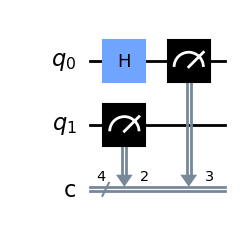

In [1]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2,4)
circuit.h(0)
circuit.measure([1,0],[2,3])
circuit.draw(output='mpl')

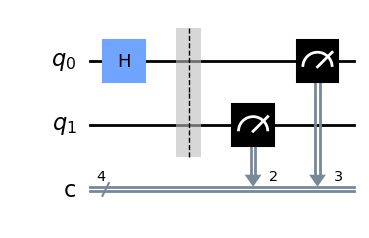

In [2]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2,4)
circuit.h(0)
circuit.barrier()
circuit.measure([1,0],[2,3])
circuit.draw(output='mpl')

## Losowy bajt

In [3]:
from random import randrange
n = 20
r=randrange(n) # pick a number from the list {0,1,...,n-1}
print(r)

# test this method by using a loop
for i in range(10):
    print(randrange(n))

18
16
10
18
11
7
10
15
7
18
0


> Zadanie - Napisz obwód kwantowy, złożony z 8 kubitów. Zasostuj kod dla którego obrócisz kubit jeśli losowo wylosujesz 1 (z dwóch możliwości). Wykonaj całość 10 razy. Jakie liczby otrzymałeś?

x-gate is applied to the qubit with index 0
x-gate is applied to the qubit with index 1
x-gate is applied to the qubit with index 2
x-gate is applied to the qubit with index 5
x-gate is applied to the qubit with index 6
x-gate is applied to the qubit with index 7


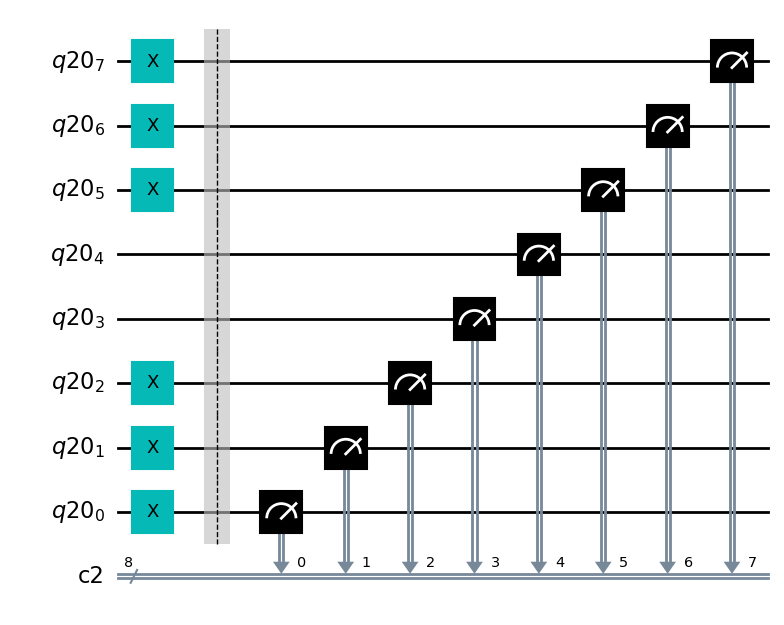

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# we use 8 qubits and 8 classical bits
q = QuantumRegister(8)
c = ClassicalRegister(8)

qc = QuantumCircuit(q,c)

# we store the index of each qubit to which x-gate is applied
picked_qubits=[] 

for i in range(8):
    if randrange(2) == 0: # Assume that 0 is Head and 1 is Tail
        qc.x(q[i]) # apply x-gate
        print("x-gate is applied to the qubit with index",i)
        picked_qubits.append(i) # i is picked

# define a barrier
qc.barrier()

# measurement 
qc.measure(q,c)  

# draw the circuit

#mycircuit.draw(reverse_bits=True)
qc.draw(output='mpl',reverse_bits=True)

In [21]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)

counts = job.result().get_counts(qc)

In [20]:
print(counts, "is observed: ", int(list(counts)[0], 2)) 

{'11100111': 1} is observed:  231


## dodawanie obwodów

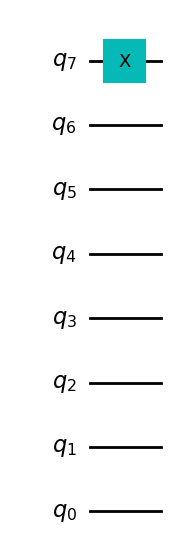

In [27]:
# encoding
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

qc_encode = QuantumCircuit(8)
qc_encode.x(7) # flip the qubit with index 7 (the last one)

qc_encode.draw(output='mpl',reverse_bits=True)

In [28]:
# pobranie wyniku
qc_output = QuantumCircuit(8,8)
for j in range(8):
    qc_output.measure(j,j)

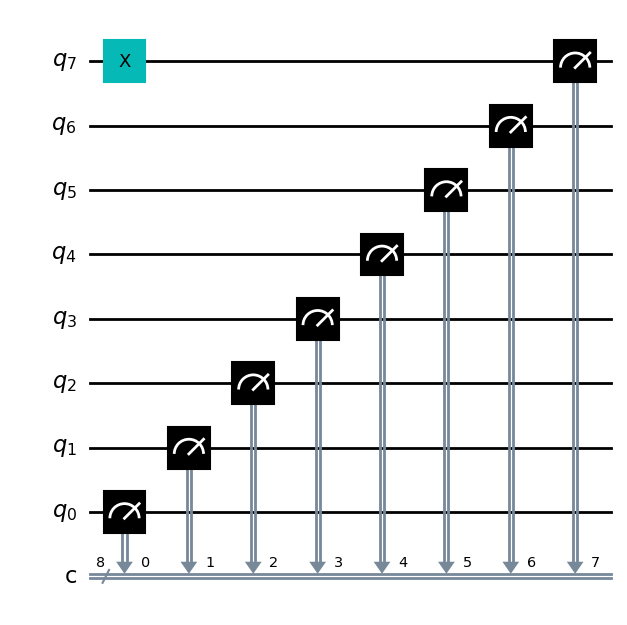

In [29]:
# razem
qc = qc_encode & qc_output # uwaga operator + nie jest już dostępny w qiskit
qc.draw(output='mpl',reverse_bits=True)

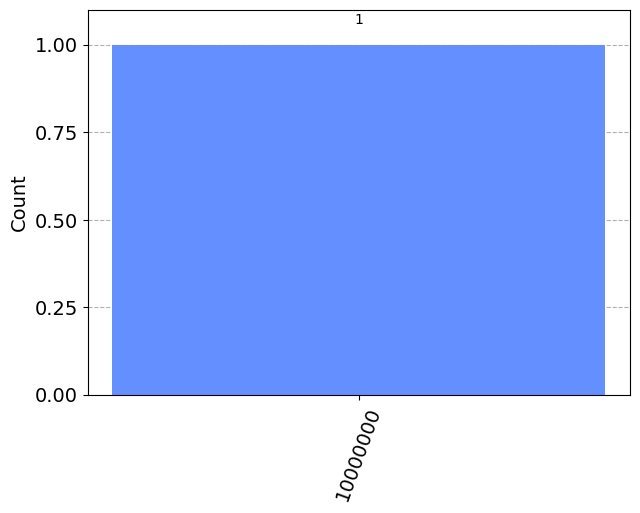

In [30]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=1).result().get_counts()
plot_histogram(counts)

## Half adder cirquit
### Napisz operator 1+1 na układzie 4 kubitów 

$$
0+0 = 00 \\
0+1 = 01 \\
1+0 = 01 \\
1+1 = 10 \\
$$

zauwaz, ze mamy dwa typy rozwiązań: dwa bity takie same i dwa bity rozne. 
Aby napisać prawidłowe rozwiązanie musimy stworzyć bramki, które będą rozpoznawać czy dwa kubity są takie same czy tez rózne. Dla przypomnienia - klasycznie rolę taką pełni bramka `XOR`.


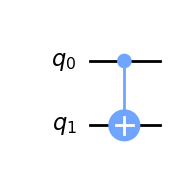

In [32]:
qc  = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

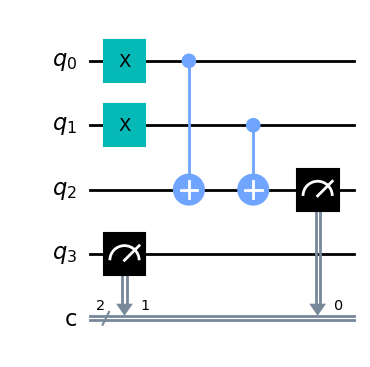

In [33]:
qc = QuantumCircuit(4,2)
# zakodowanie danych wejściowych do kubitu 1 i 2 
qc.x(0) 
qc.x(1) # bo chcemy policzyc 1+1 
# uzyjemy CNOT
qc.cx(0,2)
qc.cx(1,2)
qc.measure(2,0) # wydobycie wyniku XOR
qc.measure(3,1) # wydobycie wyniku AND
qc.draw(output='mpl')

Co z bitem otrzymywanym z `q3` ? - jego wartość dla pierwszych trzech równań zawsze wynosi 0. Jednak dla równania 1+1 powinniśmy otrzymać 1. Do rozwiązania tego problemu mozna wykorzystać bramkę operującą na 3 kubitach. 
Bramka ta to bramka `Toffoli`. 

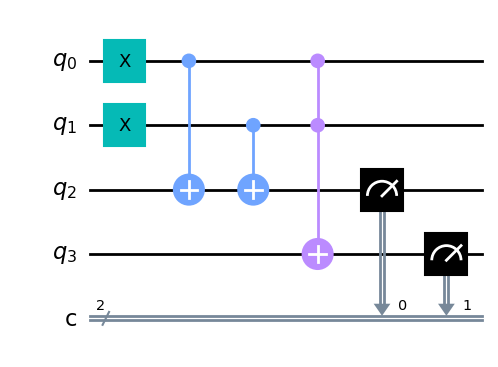

In [34]:
qc = QuantumCircuit(4,2)
# zakodowanie danych wejściowych do kubitu 1 i 2 
qc.x(0) 
qc.x(1) # bo chcemy policzyc 1+1 
# uzyjemy CNOT
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3) # AND
qc.measure(2,0) # wydobycie wyniku XOR
qc.measure(3,1) # wydobycie wyniku AND
qc.draw(output='mpl')

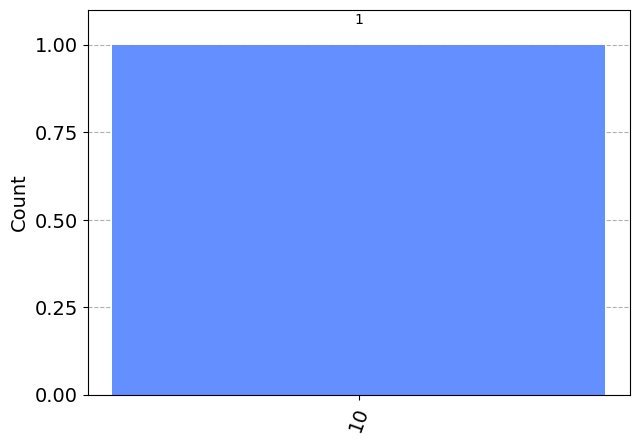

In [35]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=1).result().get_counts()
plot_histogram(counts)

Dla przypomnienia: 

In [39]:
print("wynik 1+1 =",int('10',2))

wynik 1+1 = 2


### sprawdź wszystkie mozliwe wyniki

In [45]:
for input in ['00','01','10','11']:
    
    mycircuit1 = QuantumCircuit(4,2)
    
    #Initialization - Note qiskit order
    if input[0] == '1':
        mycircuit1.x(1)
    if input[1] == '1':
        mycircuit1.x(0)

    mycircuit1.cx(0,2)
    mycircuit1.cx(1,2)
    mycircuit1.ccx(0,1,3)

    mycircuit1.measure(2,0)
    mycircuit1.measure(3,1)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(mycircuit1)
    print("Input:", input, "Output:", counts)

Input: 00 Output: {'00': 1}
Input: 01 Output: {'01': 1}
Input: 10 Output: {'01': 1}
Input: 11 Output: {'10': 1}


> Zadanie - czy potrafisz utworzyć 3 kubitową wersję bramki `OR`

## Deutsch Algorithm


Given a boolean function $f:\{0,1\} \rightarrow \{0, 1\}$, we say $f$ is balanced if $f(0) \neq f(1)$ and constant if $f(0) = f(1)$.

Given  $f:\{0,1\} \rightarrow \{0, 1\}$ as an oracle, that is we can evaluate it for an input by making queries but we can't look inside, the problem is to decide whether $f$ is constant or balanced.

<h3>Oracle model of computation </h3>

Suppose that your friend picks such a function $f$ and you try to guess whether it is constant or balanced. You are only allowed to ask questions like "What is $f(0)$?" Each question you ask, is a query to the function $f$. In quantum computing, many algorithms rely on this oracle model of computation and the aim is to solve some problem making as minimum queries as possible.


## Classical solution

Given such a function, we need to evaluate the function *twice* to get an answer using a classical computer. 

## Quantum solution

We had previously established that every 'classical' logical function $f$ can be converted to an equivalent unitary operator $U_f$ (by constructing a logical quantum circuit). Now we are going to propose a quantum algorithm that evaluates $U_f$ only *once*.

<h2> Algorithm </h2>

We construct a 2 qubit circuit.

- Set the second qubit to state $\ket{-}$ by applying $X$ and $H$ gates.

- Apply $H$ to first qubit.

- Apply $U_f$.

- Apply $H$ to first qubit.

- Measure the first qubit. If it is 0 then $f$ is constant. If it is 1, then $f$ is balanced.

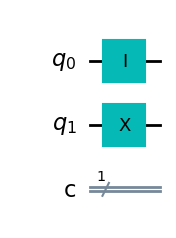

In [46]:
# krok 1 2 kubitowy circuit
qc = QuantumCircuit(2,1)
qc.i(0)
qc.x(1)
qc.draw(output='mpl')

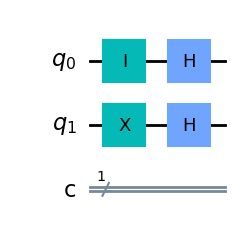

In [47]:
# krok 2 hadamard na oba kubity

qc.h(0)
qc.h(1)
qc.draw(output='mpl')